In [2]:
'''
Import dependencies
'''
import numpy as np
import pandas as pd
from skimage.data import imread
import matplotlib.pyplot as plt

In [3]:
# Check directory
import os
print(os.listdir("./"))

['taylor_11_22.zip', 'Add layers to grey scale-latest.ipynb', 'Add layers to grey scale-Copy3.ipynb', 'classification-competition-cleanup-tensors.ipynb', 'Untitled.ipynb', '11_25', '2spec.sh', 'classification-competition.ipynb', 'Add layers to grey scale.ipynb', 'a', 'Add layers to grey scale-latest-Copy1.ipynb', 'subvoc_data', 'classification-competition-cleanup-tensors-size-to128-grey.ipynb', 'explore-Copy1.ipynb', '11_22', 'spec.sh', '.ipynb_checkpoints', 'Add layers to grey scale-Copy1.ipynb', 'CNN_CLASSIFIER', 'test_data.zip', 'taylor_11_25_public.zip', 'new_data', 'Add layers to grey scale-Copy2.ipynb', '11_14', 'predict', 'Add layers to grey scale-1024-96x192.ipynb']


In [6]:
# Add training data directories
train_dir1 = './11_14/'
train_dir2 = './11_22/'
train_dir3 = './11_25/'

8


In [19]:
#Get filenames 
data_onef1 = os.listdir(train_dir1 + 'one/'+ 'ch1/2s/')
data_onef2 = os.listdir(train_dir2 + 'one/'+ 'ch1/2s/')
data_onef3 = os.listdir(train_dir3 + 'one/'+ 'ch1/2s/')

data_twof1= os.listdir(train_dir1 + 'two/'+ 'ch1/2s/')
data_twof2 = os.listdir(train_dir2 + 'two/'+ 'ch1/2s/')
data_twof3 = os.listdir(train_dir3 + 'two/'+ 'ch1/2s/')


In [20]:
# Check number of files in each directory
print (len(data_onef1))
print (len(data_onef2))
print (len(data_onef3))
print (len(data_twof1))
print (len(data_twof2))
print (len(data_twof3))

#Create paths
zeros = len(data_onef1) + len(data_onef2) + len(data_onef3)
ones = len(data_twof1) + len(data_twof2) + len(data_twof3)

print(zeros)
print(ones)

1017
1024
518
1017
1024
518
2559
2559


In [21]:
'''
Create Training Labels
'''
Y_train = np.append(np.full(zeros, 1), np.full(ones, 2))

In [22]:
'''
Create training file paths
'''
def append_dir(dir, list):
    l = []
    for imgfile in list:
        l.append(dir + imgfile)
    return (l)

def create_paths(list1, list2, list3, list4, list5, list6):
    l = []
    for imgfile in list1:
        l.append('./11_14/one/ch1/2s/' + imgfile)
        l.append('./11_14/one/ch2/2s/' + imgfile)
        l.append('./11_14/one/ch3/2s/' + imgfile)
        l.append('./11_14/one/ch4/2s/' + imgfile)
    for imgfile in list2:
        l.append('./11_22/one/ch1/2s/' + imgfile)
        l.append('./11_22/one/ch2/2s/' + imgfile)
        l.append('./11_22/one/ch3/2s/' + imgfile)
        l.append('./11_22/one/ch4/2s/' + imgfile)
    for imgfile in list3:
        l.append('./11_25/one/ch1/2s/' + imgfile)
        l.append('./11_25/one/ch2/2s/' + imgfile)
        l.append('./11_25/one/ch3/2s/' + imgfile)
        l.append('./11_25/one/ch4/2s/' + imgfile)
    for imgfile in list4:
        l.append('./11_14/two/ch1/2s/' + imgfile)
        l.append('./11_14/two/ch2/2s/' + imgfile)
        l.append('./11_14/two/ch3/2s/' + imgfile)
        l.append('./11_14/two/ch4/2s/' + imgfile)
    for imgfile in list5:
        l.append('./11_22/two/ch1/2s/' + imgfile)
        l.append('./11_22/two/ch2/2s/' + imgfile)
        l.append('./11_22/two/ch3/2s/' + imgfile)
        l.append('./11_22/two/ch4/2s/' + imgfile)
    for imgfile in list6:
        l.append('./11_25/two/ch1/2s/' + imgfile)
        l.append('./11_25/two/ch2/2s/' + imgfile)
        l.append('./11_25/two/ch3/2s/' + imgfile)
        l.append('./11_25/two/ch4/2s/' + imgfile)
    return (l)
    

In [23]:
data_paths = create_paths(data_onef1, data_onef2, data_onef3, data_twof1, data_twof2, data_twof3)

In [24]:
data_paths

['./11_14/one/ch1/2s/00923.png',
 './11_14/one/ch2/2s/00923.png',
 './11_14/one/ch3/2s/00923.png',
 './11_14/one/ch4/2s/00923.png',
 './11_14/one/ch1/2s/00277.png',
 './11_14/one/ch2/2s/00277.png',
 './11_14/one/ch3/2s/00277.png',
 './11_14/one/ch4/2s/00277.png',
 './11_14/one/ch1/2s/00003.png',
 './11_14/one/ch2/2s/00003.png',
 './11_14/one/ch3/2s/00003.png',
 './11_14/one/ch4/2s/00003.png',
 './11_14/one/ch1/2s/00023.png',
 './11_14/one/ch2/2s/00023.png',
 './11_14/one/ch3/2s/00023.png',
 './11_14/one/ch4/2s/00023.png',
 './11_14/one/ch1/2s/00517.png',
 './11_14/one/ch2/2s/00517.png',
 './11_14/one/ch3/2s/00517.png',
 './11_14/one/ch4/2s/00517.png',
 './11_14/one/ch1/2s/00377.png',
 './11_14/one/ch2/2s/00377.png',
 './11_14/one/ch3/2s/00377.png',
 './11_14/one/ch4/2s/00377.png',
 './11_14/one/ch1/2s/00884.png',
 './11_14/one/ch2/2s/00884.png',
 './11_14/one/ch3/2s/00884.png',
 './11_14/one/ch4/2s/00884.png',
 './11_14/one/ch1/2s/00035.png',
 './11_14/one/ch2/2s/00035.png',
 './11_14/

In [25]:
len(data_paths)

20472

In [26]:
# Import image list and transform to np array

from PIL import Image
data = np.empty((len(data_paths),96,192), dtype=np.float32)
data_target = Y_train
image_name_list = data_paths
index = 0
for image_name in data_paths:
    imageA = Image.open(data_paths[index]).convert('L')
    data[index] = imageA
    index+=1

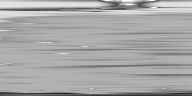

In [27]:
# Check image

from PIL import Image

im = Image.open
im("./11_14/two/ch1/2s/00003.png").convert('L')

In [28]:
# Check image array and data shapes

print(data.shape)
print(data_target.shape)

(20472, 96, 192)
(5118,)


In [29]:
print (data[0][0][0])

193.0


In [30]:
print (data[0][0])

[193. 193. 193. 193. 188. 188. 188. 184. 184. 184. 184. 184. 184. 184.
 179. 179. 174. 174. 174. 174. 174. 174. 174. 169. 169. 169. 169. 169.
 169. 164. 164. 159. 159. 159. 159. 159. 159. 159. 159. 159. 153. 153.
 153. 153. 153. 153. 147. 141. 135. 141. 147. 153. 153. 147. 141. 141.
 135. 135. 135. 129. 135. 141. 147. 153. 147. 135. 117. 104. 104. 110.
 129. 141. 147. 141. 129. 117. 117. 123. 123. 123. 123. 117. 117. 117.
 117. 117. 117. 117. 117. 110. 110. 110. 110. 110. 110. 110.  97.  78.
  89. 104. 120. 150. 190. 230. 252. 255. 255. 246. 238. 226. 212. 201.
 196. 184. 190. 201. 212. 217. 226. 230. 226. 226. 240. 252. 255. 254.
 255. 255. 255. 255. 255. 253. 238. 234. 243. 252. 255. 255. 255. 243.
 217. 207. 207. 207. 207. 212. 212. 212. 217. 238. 254. 255. 255. 255.
 243. 230. 212. 184. 164. 135.  97.  84.  91.  91.  84.  78.  78.  84.
  91.  97.  84.  78.  78.  84.  91.  91.  97.  91.  91.  91.  97.  97.
  97.  97.  97.  97.  97. 104. 104. 104. 104. 104.]


In [31]:
print (data[0][1])

[207. 207. 204. 204. 204. 204. 204. 204. 200. 200. 200. 200. 196. 196.
 196. 196. 196. 196. 196. 196. 193. 193. 193. 193. 193. 193. 188. 188.
 188. 188. 188. 188. 188. 188. 184. 184. 184. 184. 179. 179. 179. 179.
 179. 179. 174. 174. 174. 179. 179. 174. 174. 174. 169. 169. 169. 169.
 169. 169. 169. 169. 169. 169. 169. 169. 164. 164. 159. 159. 159. 159.
 164. 164. 169. 164. 159. 153. 153. 153. 159. 153. 153. 153. 153. 153.
 153. 153. 153. 153. 153. 147. 147. 147. 147. 147. 147. 147. 135. 129.
 117. 110.  97.  84.  81. 104. 120. 135. 150. 157. 157. 164. 164. 164.
 157. 157. 164. 170. 184. 190. 196. 201. 201. 201. 212. 230. 238. 234.
 240. 254. 255. 255. 252. 230. 212. 207. 217. 226. 243. 248. 240. 217.
 196. 184. 184. 184. 177. 177. 177. 177. 170. 177. 170. 170. 157. 142.
 128. 120. 112.  97.  81.  84. 104. 123. 129. 129. 129. 117. 117. 123.
 129. 129. 129. 123. 123. 129. 129. 129. 135. 129. 129. 129. 135. 135.
 135. 135. 135. 135. 135. 141. 141. 141. 141. 141.]


In [32]:
# Reshape np array to 4 channels

data = np.reshape(data, (-1,96, 192,4), 'C')

In [33]:
data[0]

array([[[193., 193., 193., 193.],
        [188., 188., 188., 184.],
        [184., 184., 184., 184.],
        ...,
        [210., 210., 210., 210.],
        [210., 210., 210., 210.],
        [210., 210., 213., 213.]],

       [[225., 225., 225., 225.],
        [225., 225., 225., 225.],
        [225., 225., 225., 225.],
        ...,
        [204., 204., 204., 204.],
        [204., 207., 207., 207.],
        [207., 207., 207., 207.]],

       [[222., 222., 222., 222.],
        [221., 221., 221., 221.],
        [221., 221., 221., 220.],
        ...,
        [154., 153., 153., 153.],
        [153., 153., 153., 152.],
        [152., 152., 152., 152.]],

       ...,

       [[157., 157., 157., 157.],
        [157., 157., 157., 157.],
        [154., 154., 154., 150.],
        ...,
        [ 71.,  71.,  71.,  71.],
        [ 71.,  71.,  77.,  77.],
        [ 77.,  84.,  84.,  84.]],

       [[171., 169., 167., 164.],
        [161., 161., 157., 157.],
        [157., 157., 157., 157.],
        .

In [34]:
data.shape

(5118, 96, 192, 4)

In [35]:
data

array([[[[193., 193., 193., 193.],
         [188., 188., 188., 184.],
         [184., 184., 184., 184.],
         ...,
         [210., 210., 210., 210.],
         [210., 210., 210., 210.],
         [210., 210., 213., 213.]],

        [[225., 225., 225., 225.],
         [225., 225., 225., 225.],
         [225., 225., 225., 225.],
         ...,
         [204., 204., 204., 204.],
         [204., 207., 207., 207.],
         [207., 207., 207., 207.]],

        [[222., 222., 222., 222.],
         [221., 221., 221., 221.],
         [221., 221., 221., 220.],
         ...,
         [154., 153., 153., 153.],
         [153., 153., 153., 152.],
         [152., 152., 152., 152.]],

        ...,

        [[157., 157., 157., 157.],
         [157., 157., 157., 157.],
         [154., 154., 154., 150.],
         ...,
         [ 71.,  71.,  71.,  71.],
         [ 71.,  71.,  77.,  77.],
         [ 77.,  84.,  84.,  84.]],

        [[171., 169., 167., 164.],
         [161., 161., 157., 157.],
         [15

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(data,data_target, test_size = 0.1)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((4606, 96, 192, 4), (512, 96, 192, 4), (4606,), (512,))

In [37]:
x_val

array([[[[196., 200., 200., 200.],
         [196., 196., 193., 193.],
         [193., 188., 193., 193.],
         ...,
         [219., 219., 219., 217.],
         [217., 217., 217., 217.],
         [217., 217., 217., 217.]],

        [[224., 224., 224., 225.],
         [225., 225., 225., 225.],
         [225., 225., 225., 225.],
         ...,
         [222., 222., 222., 222.],
         [222., 222., 224., 224.],
         [224., 224., 225., 225.]],

        [[174., 179., 184., 184.],
         [184., 184., 184., 184.],
         [179., 179., 179., 174.],
         ...,
         [199., 202., 202., 202.],
         [202., 204., 204., 204.],
         [204., 206., 206., 206.]],

        ...,

        [[171., 171., 171., 170.],
         [170., 169., 169., 168.],
         [169., 169., 171., 171.],
         ...,
         [ 95.,  95.,  95.,  95.],
         [ 95.,  95.,  95.,  95.],
         [ 95.,  95., 101., 101.]],

        [[178., 178., 178., 178.],
         [178., 178., 178., 178.],
         [17

In [38]:
data_target

array([0, 0, 0, ..., 1, 1, 1])

In [39]:
import tensorflow as tf
'''
Set training and evaluation hyperparameters
x - according to the documentation I am passing a dictionary of my training features
y - passing the training labels
batch_size - how many images I want to pass to my NN in a single training step. 
             The gradients and the loss for the training step will be calculated only on these images. 
num_epochs - when I want to complete the execution of this method. With the current setting (1) 
             when the input function goes through all images once it will complete.
shuffle    - do I want to read the images in order or no. It is a better strategy to 
             shuffle within the training images during training.
'''
train_input_fn = tf.estimator.inputs.numpy_input_fn(
      x={'x':x_train},
      y=y_train,
      batch_size=30,
      num_epochs=10,
      shuffle=True)

'''
What the eval_input_fn will do with its current settings is to read the entire training dataset 
(in order) using batch_size of 128 (default setting). 

Keep in mind that it will also terminate when completes 1 epoch.
'''
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'x':x_val},
    y=y_val,
    shuffle=False,
    num_epochs=1)



In [40]:
data.shape

(5118, 96, 192, 4)

In [41]:
# test_data[400:].shape

In [42]:
def cnn_model_function(features, labels, mode):
    '''
    Define CNN Model
    This is the function which describes the structure of the neural network
    '''
    
    # input layer
    # reshaping x to 4-D tensor: [batch_size, width, height, channels]
    # features['x'] - the dictionary we passed for x in the input functions
    layer_1 = tf.reshape(features['x'], [-1, 96, 192, 4])
    
    # convolution layer 2
    # computes 16 features using 3x3 filter with ReLU activation.
    # input tensor: [batch_size, 96, 192, 4]
    # output tensor: [batch_size, 96, 96, 16]
    layer_2 = tf.layers.conv2d(                          
                inputs=layer_1,
                filters=16,
                kernel_size=[3, 3],
                padding="same",
                data_format = 'channels_last',
                activation=tf.nn.relu)
    
    # Max Pooling size 2,2 stride 2
    layer_3 = tf.layers.max_pooling2d(layer_2, pool_size=[2, 2], strides=2)
    
    # convolution layer 3
    # computes 32 features using 3x3 filter with ReLU activation.
    # input tensor: [batch_size, 96, 192, 32]
    # output tensor: [batch_size, 96, 192, 64]
    layer_4 = tf.layers.conv2d(
                inputs=layer_3,
                filters=32,
                kernel_size=[3, 3],
                padding="same",
                data_format = 'channels_last',
                activation=tf.nn.relu)
    
    # Max Pooling size 2,2 stride 2
    layer_5 = tf.layers.max_pooling2d(layer_4, pool_size=[2, 2], strides=2)
    
    # dropout .2
    layer_6 = tf.layers.dropout(inputs=layer_5, rate=0.2, training=(mode == tf.estimator.ModeKeys.TRAIN))
    
    # convolution layer 4
    # computes 64 features using 3x3 filter with ReLU activation.
    # input tensor: [batch_size, 96, 192, 32]
    # output tensor: [batch_size, 96, 192, 64]
    layer_7 = tf.layers.conv2d(
                inputs=layer_6,
                filters=64,
                kernel_size=[3, 3],
                padding="same",
                data_format = 'channels_last',
                activation=tf.nn.relu)
    
    # Max Pooling size 2,2 stride 2
    layer_8 = tf.layers.max_pooling2d(layer_7, pool_size=[2, 2], strides=2)
    
    # convolution layer 5
    # computes 128 features using 3x3 filter with ReLU activation.
    # input tensor: [batch_size, 96, 192, 64]
    # output tensor: [batch_size, 96, 192, 128]
    layer_9 = tf.layers.conv2d(
                inputs=layer_8,
                filters=128,
                kernel_size=[3, 3],
                padding="same",
                data_format = 'channels_last',
                activation=tf.nn.relu)
    
    # Max Pooling size 2,2 stride 2
    layer_10 = tf.layers.max_pooling2d(layer_9, pool_size=[2, 2], strides=2)    
    # Flatten tensor into a batch of vectors
    # Input Tensor Shape: [batch_size, 96, 192, 128]
    # Output Tensor Shape: [batch_size, 96, 192 512]
    
    layer_11 = tf.layers.conv2d(
                inputs=layer_10,
                filters=512,
                kernel_size=[2, 2],
                padding="same",
                data_format = 'channels_last',
                activation=tf.nn.relu)
    
    layer_12 = tf.layers.flatten(layer_11)
    
    # Dense Layer
    # Densely connected layer with 1024 neurons
    # Input Tensor Shape: [batch_size, 96 * 192 * 512]
    # Output Tensor Shape: [batch_size, 1024]
    layer_13 = tf.layers.dense(inputs=layer_12, units=512, activation=tf.nn.relu)
    
    # Dropout operation; 0.2 probability that element will be kept
    # notice that this layer will perform droupout only during training!
    layer_14 = tf.layers.dropout(inputs=layer_13, rate=0.2, training=(mode == tf.estimator.ModeKeys.TRAIN))
    
    # Logits layer
    # Input Tensor Shape: [batch_size, 1024]
    # Output Tensor Shape: [batch_size, 2]
    logits = tf.layers.dense(inputs=layer_14, units=2)
    
    print("Logits: %s"% (logits))
    
    # define the values which our neural network will output
    # classes - which number the NN 'thinks' is on the image
    # probabilities - how certain our NN is about its prediction
    predictions = {
                "classes": tf.argmax(input=logits, axis=1),
                "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
    }
    print("classes: %s - Predictions: %s"% (tf.argmax(input=logits, axis=1), tf.nn.softmax(logits, name="softmax_tensor")))
    
    # here we define what happens if we call the predict method of our estimator
    # with the current settings it will return the dictionary defined above
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)
    
    # here we define the loss for our training (the thing we minimize)
    # I do not need to perform one-hot-encoding to my training labels because the method
    # sparse_softmax_cross_entropy will do that for me and I don't need to think about that
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)
    
    # here we define how we calculate our accuracy
    # if you want to monitor your training accuracy you need these two lines
    accuracy = tf.metrics.accuracy(labels=labels, predictions=predictions['classes'], name='acc_op')
    tf.summary.scalar('accuracy', accuracy[1])
    
    # here we define what happens if we call the train method of our estimator
    # with its current settings it will adjust the weights and biases of our neurons
    # using the Adam Optimization Algorithm based on the loss function we defined earlier
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
        train_op = optimizer.minimize(
            loss=loss,
            global_step=tf.train.get_global_step())
        tf.identity(accuracy[1], name='train_accuracy')
        tf.summary.scalar('train_accuracy', accuracy[1])
        eval_metric_ops = {"train_accuracy":accuracy}
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op, eval_metric_ops=eval_metric_ops)
    
    # what evaluation metric we want to show
    tf.identity(accuracy[1], name='val_accuracy')
    tf.summary.scalar('val_accuracy', accuracy[1])
    eval_metric_ops = {'val_accuracy':accuracy}
    # here we define what happens if we call the evaluate method of our estimator
    # with its current settings it will display the loss and the accuracy which we defined earlier
    return tf.estimator.EstimatorSpec(
                mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

In [43]:
tf.logging.set_verbosity(tf.logging.ERROR)

In [44]:
'''
# first we define a folder where tensorflow will keep its progress
# this includes periodical saves of our weight, biases, accuracy, loss and etc.
# so if we have more training images we can simply continue training on them
OUTDIR = './CNN_CLASSIFIER'

# we create an estimator object which:
# - is using the Neural Net structure from the cnn_model_function
# - reads/writes the files written in the directory which we defined earlier
cnn_classifier = tf.estimator.Estimator(model_fn=cnn_model_function, model_dir=OUTDIR)

# here we start the FileWriter method which will actually save the progress in the folder defined above
file_writer = tf.summary.FileWriter(OUTDIR)

# a small helper function which trains/evaluates our network for a given number of epochs
# remember that our input functions go through the datasets only once
def train_and_evaluate(estimator, epochs=2):
    for i in range(epochs):
        estimator.train(input_fn=train_input_fn)
        estimator.evaluate(input_fn=eval_input_fn)
'''

"\n# first we define a folder where tensorflow will keep its progress\n# this includes periodical saves of our weight, biases, accuracy, loss and etc.\n# so if we have more training images we can simply continue training on them\nOUTDIR = './CNN_CLASSIFIER'\n\n# we create an estimator object which:\n# - is using the Neural Net structure from the cnn_model_function\n# - reads/writes the files written in the directory which we defined earlier\ncnn_classifier = tf.estimator.Estimator(model_fn=cnn_model_function, model_dir=OUTDIR)\n\n# here we start the FileWriter method which will actually save the progress in the folder defined above\nfile_writer = tf.summary.FileWriter(OUTDIR)\n\n# a small helper function which trains/evaluates our network for a given number of epochs\n# remember that our input functions go through the datasets only once\ndef train_and_evaluate(estimator, epochs=2):\n    for i in range(epochs):\n        estimator.train(input_fn=train_input_fn)\n        estimator.evaluat

In [45]:
# first we define a folder where tensorflow will keep its progress
# this includes periodical saves of our weight, biases, accuracy, loss and etc.
# so if we have more training images we can simply continue training on them
OUTDIR = './CNN_CLASSIFIER/2d_conv_250hztrim-grey-96x192/'

# we create an estimator object which:
# - is using the Neural Net structure from the cnn_model_function
# - reads/writes the files written in the directory which we defined earlier
cnn_classifier = tf.estimator.Estimator(model_fn=cnn_model_function, model_dir=OUTDIR)

# here we start the FileWriter method which will actually save the progress in the folder defined above
file_writer = tf.summary.FileWriter(OUTDIR)

# a small helper function which trains/evaluates our network for a given number of epochs
# remember that our input functions go through the datasets only once
def train_and_evaluate(estimator, epochs=1000):
    for i in range(epochs):
        estimator.train(input_fn=train_input_fn,steps=1)
        #estimator.train(input_fn=train_input_fn)
        file_writer = tf.summary.FileWriter(OUTDIR)
        estimator.evaluate(input_fn=eval_input_fn)

# and here we finally start training/evaluating the NN for 1000 epochs
train_and_evaluate(cnn_classifier)


Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)
Logits: Tensor("dense_1/BiasAdd:0",

KeyboardInterrupt: 

In [82]:
'''
Get list of folderes for test data
'''
test_v2 = os.listdir('./predict/test_data/')
print(len(test_v2))
print(test_v2)

1002
['BG4LRE5L', 'T8VFYTOA', 'Q6D7QRR7', '0QD4ZGZ7', '3ELCWQBH', '1GF3IKH0', 'ML1RACQN', 'PU61CSCN', 'C82NFIRI', 'C25FR8D5', 'PY8R9665', 'PCMT5JJ2', 'MPAVNNFR', '0NZTS94B', 'RZS1CXOC', '9NVIUIY1', 'J2WMFHEC', 'XUHNKCSK', 'NVQAZYA7', '1IB7U1NC', 'W9171IHF', 'Z0YUHOJX', '33UWUR5C', 'PAVW3WDL', 'TEE2BI72', 'AH0NT7GJ', 'DRDHJ6HF', 'FJH50849', 'SCEOLMS2', 'YOLT8CNE', '8GTDFVOO', 'MTVAYAA9', 'AJNLX7ID', 'HOZVE1HB', 'MRI0UIMH', 'U2XT9IK1', 'FGZCZT70', 'XAHCYE90', 'IGWTG6HJ', 'W07ZU7TL', 'ZFS4KQ43', 'QS72XQRX', '3CIYSPYM', 'VUCQS9UH', '5WTJB1YE', 'D6PUYCNC', 'HTQ3YISD', 'VGYBUUUO', 'TT7B7RP0', 'RE31VKEQ', '2UM2WVOK', 'EULJQH7P', '7ELOYIFM', 'KDY57RN5', 'YIMWJ7HU', 'RPW7OD1M', 'VC660MJI', 'N7AX0SI3', 'W7Q7OJV0', 'ZQEGP670', 'JWI0JS7G', '1RNO8R4Y', 'L7RQKTV6', 'DUA44RNR', 'ORQUUF8K', 'M6V4PKGC', 'BQLPCDTF', 'NLR1QW4N', '3XQ9A5YT', 'QIDHN8Q0', 'FBUWWBH0', 'FJWOMISD', 'YLO8G5N0', 'YP9UZXE3', '3OQMGWMO', 'Q7ZIIY5R', 'T89X3479', 'WJA8EFVU', 'XZ2FYFW5', '48FWNL2A', '99QCSHHK', 'P42IAEJG', 'I0LRMCXI'

In [83]:
from PIL import Image

test_data = np.empty((len(test_v2)*4,96,192), dtype=np.float32)
test_data_target = np.empty((len(test_v2)*4), dtype=np.int32)
image_name_dir = test_v2
index = 0
for folder_name in image_name_dir:
    imageA = Image.open('./predict/test_data/' + folder_name + '/ch1.wav.png').convert('L')
    test_data[index]=imageA
    index+=1
    imageA = Image.open('./predict/test_data/' + folder_name + '/ch2.wav.png').convert('L')
    test_data[index]=imageA
    index+=1
    imageA = Image.open('./predict/test_data/' + folder_name + '/ch3.wav.png').convert('L')
    test_data[index]=imageA
    index+=1
    imageA = Image.open('./predict/test_data/' + folder_name + '/ch4.wav.png').convert('L')
    test_data[index]=imageA
    index+=1

In [84]:
test_v2

['BG4LRE5L',
 'T8VFYTOA',
 'Q6D7QRR7',
 '0QD4ZGZ7',
 '3ELCWQBH',
 '1GF3IKH0',
 'ML1RACQN',
 'PU61CSCN',
 'C82NFIRI',
 'C25FR8D5',
 'PY8R9665',
 'PCMT5JJ2',
 'MPAVNNFR',
 '0NZTS94B',
 'RZS1CXOC',
 '9NVIUIY1',
 'J2WMFHEC',
 'XUHNKCSK',
 'NVQAZYA7',
 '1IB7U1NC',
 'W9171IHF',
 'Z0YUHOJX',
 '33UWUR5C',
 'PAVW3WDL',
 'TEE2BI72',
 'AH0NT7GJ',
 'DRDHJ6HF',
 'FJH50849',
 'SCEOLMS2',
 'YOLT8CNE',
 '8GTDFVOO',
 'MTVAYAA9',
 'AJNLX7ID',
 'HOZVE1HB',
 'MRI0UIMH',
 'U2XT9IK1',
 'FGZCZT70',
 'XAHCYE90',
 'IGWTG6HJ',
 'W07ZU7TL',
 'ZFS4KQ43',
 'QS72XQRX',
 '3CIYSPYM',
 'VUCQS9UH',
 '5WTJB1YE',
 'D6PUYCNC',
 'HTQ3YISD',
 'VGYBUUUO',
 'TT7B7RP0',
 'RE31VKEQ',
 '2UM2WVOK',
 'EULJQH7P',
 '7ELOYIFM',
 'KDY57RN5',
 'YIMWJ7HU',
 'RPW7OD1M',
 'VC660MJI',
 'N7AX0SI3',
 'W7Q7OJV0',
 'ZQEGP670',
 'JWI0JS7G',
 '1RNO8R4Y',
 'L7RQKTV6',
 'DUA44RNR',
 'ORQUUF8K',
 'M6V4PKGC',
 'BQLPCDTF',
 'NLR1QW4N',
 '3XQ9A5YT',
 'QIDHN8Q0',
 'FBUWWBH0',
 'FJWOMISD',
 'YLO8G5N0',
 'YP9UZXE3',
 '3OQMGWMO',
 'Q7ZIIY5R',
 'T89X3479',

In [85]:
test_data = np.reshape(test_data, (-1,96, 192,4), 'C')

In [86]:
'''
What the predict_input_fn will do with its current settings is to read the entire inference dataset 
(in order) using batch_size of 128 (default setting). 

Keep in mind that it will also terminate when completes 1 epoch.
'''
predict_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'x':test_data},
    shuffle=False,
    num_epochs=2)

In [87]:
test_data.shape

(1002, 96, 192, 4)

In [88]:
generator = cnn_classifier.predict(input_fn=predict_input_fn)

In [89]:
def unique(list1): 
  
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 
    # print list 
    for x in unique_list: 
        print (x, end=" ")

In [90]:
#preds = []
preds9 = []

In [91]:
for i in range(len(test_data)):
    preds9.append(next(generator)['classes'])

Logits: Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
classes: Tensor("ArgMax_1:0", shape=(?,), dtype=int64) - Predictions: Tensor("softmax_tensor_1:0", shape=(?, 2), dtype=float32)


In [92]:
unique(preds9)

1 0 

In [103]:
sub = np.column_stack((test_v2, preds9))
submission = pd.DataFrame(sub)
submission.columns = ['filename', 'label']
submission2 = pd.DataFrame(sub)
submission2.columns = ['filename', 'label']
submission2 = submission2.label.where(submission2.label == 0, 1,0)
submission2


ValueError: For argument "inplace" expected type bool, received type int.

In [81]:
submission2.to_csv("submission.csv", index=False)


In [ ]:
'''
sub = np.column_stack((test_v2, preds))
submission = pd.DataFrame(sub)
submission.columns = ['fname', 'label']
'''